# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



In [86]:
import numpy as np # importamos librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as pt

In [87]:
# importamos el archivo donde se encuentra nuestra base de datos
df = pd.read_csv('/Users/andresrojo/Desktop/Bootcamp/Temario/Modulo1/Proyecto_modulo1/Titanic/titanic.csv') # index_col=0
df # vemos que carga correctamente

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Mostramos datos para analizar
print('Dimendiones: ',df.shape)
print('Cantidad de datos: ',df.size)
print('Columnas: ',df.columns)
print('Primeras filas' , df.head())
print('Últimas filas', df.tail())

Dimendiones:  (891, 12)
Cantidad de datos:  10692
Columnas:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Primeras filas    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   

In [88]:
# vemos los tipos de valores que contiene nuestra database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
# analizammos cómo esta formada y qué tipo de datos contiene
df.isnull().sum()/len(df)*100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

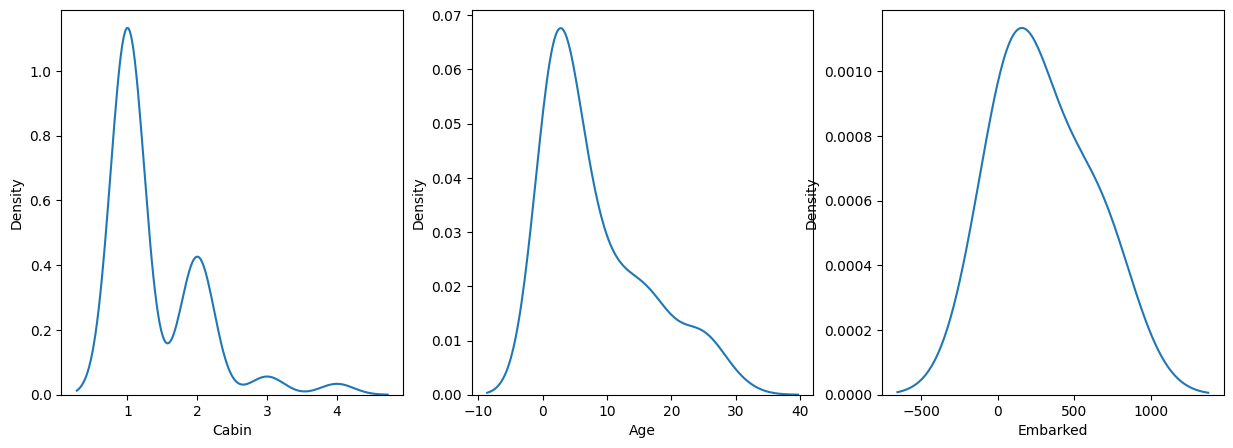

In [7]:
# de las tres columnas que nos han dado NAN las representamos de manera visual y nos hacemos una idea
fig, ax= plt.subplots(1, 3, figsize=(15,5))
sns.kdeplot(df['Cabin'].value_counts(), ax= ax[0])
sns.kdeplot(df['Age'].value_counts(), ax= ax[1])
sns.kdeplot(df['Embarked'].value_counts(), ax= ax[2]);

<Axes: >

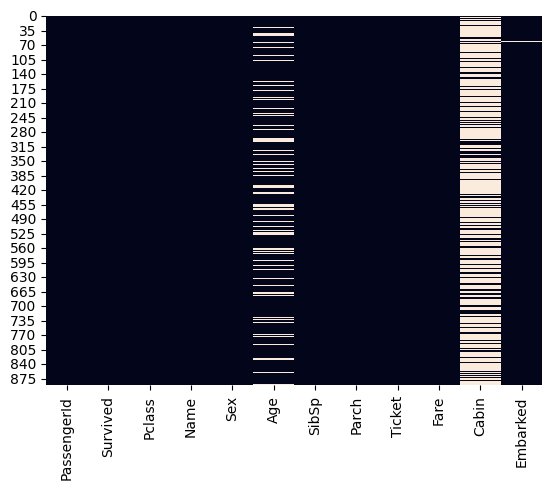

In [8]:
# este tambien es un buen ejemplo para ver de forma grafica los valores NAN
sns.heatmap(df.isnull(), cbar=False) 

In [90]:
#ejemplo de borrado de la columna Cabin
df.drop('Cabin', axis=1, inplace=True) # indicamos qué columna queremos eliminar

In [91]:
def impute_missing_values(df): # funcion de Andrés para limpiar NAN
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

df = impute_missing_values(df)

In [92]:
# cambiamos el nombre de las columnas
df.rename({'Age':'Edad', 'Sex':'Sexo', 'Survived': 'Superviviente', 'Pclass':'Clase','Name': 'Nombre','Fare':'Precio pasaje', 'Embarked': 'Puerta de embarque'}, axis=1, inplace= True)
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Precio pasaje,Puerta de embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [93]:
df.isnull().sum()/len(df)*100 # hemos reducido las variables nulas para poder trabajar mejor 

PassengerId           0.0
Superviviente         0.0
Clase                 0.0
Nombre                0.0
Sexo                  0.0
Edad                  0.0
SibSp                 0.0
Parch                 0.0
Ticket                0.0
Precio pasaje         0.0
Puerta de embarque    0.0
dtype: float64

In [13]:
# haciendo pruebas
pd.pivot_table(df, index= 'Superviviente', values=['Clase', 'Precio pasaje'])

,Clase,Precio pasaje
Superviviente,,
0,2.531876,22.117887
1,1.950292,48.395408


In [13]:
#clasificamos las columnas
df_num = ['Edad','SibSp','Parch','Precio pasaje','Clase']
df_cat = ['Superviviente', 'Cabin','Sexo','Ticket','Puerta de embarque']

In [14]:
# gráficamos las variables numéricas
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_num = ['Edad','SibSp','Precio pasaje','Clase']
fig = make_subplots(rows=1, cols=4)

for i, col in enumerate(df_num):
    fig.add_trace(go.Histogram(x=df[col], nbinsx=20, name=f'Distribución de {col}'), row=1, col=i+1 )

fig.update_layout(height=500, width=1200, title_text="Distribución Variables Numéricas", showlegend=True)
fig.show()


In [15]:
#gaficamos las variables categóricas
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_cat = ['Superviviente','Sexo','Ticket','Puerta de embarque']
fig = make_subplots(rows=2, cols=2, subplot_titles=df_cat)

for i, col in enumerate(df_cat):
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Histogram(x=df[df_cat[i]], nbinsx=20, name=f'Distribución de {df_cat[i]}'), row=row, col=col)

fig.update_yaxes(showticklabels=False, row=2, col=2)

fig.update_layout(height=600, width=700, title_text="Distribución de Variables", showlegend=False)
fig.update_xaxes(tickangle=90)
fig.show()

In [94]:

# renombramos valores dentro de las columnas para una mejor legibilidad
df['Sexo'] = df['Sexo'].str.replace('female', 'Mujer').str.replace('male', 'Hombre')

df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Precio pasaje,Puerta de embarque
0,1,0,3,"Braund, Mr. Owen Harris",Hombre,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Mujer,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Hombre,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Hombre,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",Mujer,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",Hombre,26.000000,0,0,111369,30.0000,C


In [110]:
#cambiamos el tipo de variable y la renombramos para futuros graficos
df['Clase'] = df['Clase'].astype(str)
df['Clase'] = df['Clase'].str.replace('1', 'Primera').str.replace('2', 'Segunda').str.replace('3','Tercera')
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Precio pasaje,Puerta de embarque,Rango_Edad
0,1,Muertos,Tercera,"Braund, Mr. Owen Harris",Hombre,22.000000,1,0,A/5 21171,7.2500,Southamptom,Adultos
1,2,Vivos,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.000000,1,0,PC 17599,71.2833,Cherbourg,Adultos
2,3,Vivos,Tercera,"Heikkinen, Miss. Laina",Mujer,26.000000,0,0,STON/O2. 3101282,7.9250,Southamptom,Adultos
3,4,Vivos,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.000000,1,0,113803,53.1000,Southamptom,Adultos
4,5,Muertos,Tercera,"Allen, Mr. William Henry",Hombre,35.000000,0,0,373450,8.0500,Southamptom,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Muertos,Segunda,"Montvila, Rev. Juozas",Hombre,27.000000,0,0,211536,13.0000,Southamptom,Adultos
887,888,Vivos,Primera,"Graham, Miss. Margaret Edith",Mujer,19.000000,0,0,112053,30.0000,Southamptom,Adultos
888,889,Muertos,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.699118,1,2,W./C. 6607,23.4500,Southamptom,Adultos
889,890,Vivos,Primera,"Behr, Mr. Karl Howell",Hombre,26.000000,0,0,111369,30.0000,Cherbourg,Adultos


In [109]:
#cambiamos el tipo de variable y la renombramos para futuros graficos

df['Superviviente'] = df['Superviviente'].astype(str)
df['Superviviente'] = df['Superviviente'].str.replace('1', 'Vivos').str.replace('0', 'Muertos')
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Precio pasaje,Puerta de embarque,Rango_Edad
0,1,Muertos,3,"Braund, Mr. Owen Harris",Hombre,22.000000,1,0,A/5 21171,7.2500,Southamptom,Adultos
1,2,Vivos,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.000000,1,0,PC 17599,71.2833,Cherbourg,Adultos
2,3,Vivos,3,"Heikkinen, Miss. Laina",Mujer,26.000000,0,0,STON/O2. 3101282,7.9250,Southamptom,Adultos
3,4,Vivos,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.000000,1,0,113803,53.1000,Southamptom,Adultos
4,5,Muertos,3,"Allen, Mr. William Henry",Hombre,35.000000,0,0,373450,8.0500,Southamptom,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Muertos,2,"Montvila, Rev. Juozas",Hombre,27.000000,0,0,211536,13.0000,Southamptom,Adultos
887,888,Vivos,1,"Graham, Miss. Margaret Edith",Mujer,19.000000,0,0,112053,30.0000,Southamptom,Adultos
888,889,Muertos,3,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.699118,1,2,W./C. 6607,23.4500,Southamptom,Adultos
889,890,Vivos,1,"Behr, Mr. Karl Howell",Hombre,26.000000,0,0,111369,30.0000,Cherbourg,Adultos


In [95]:
#vamos a quitar la columna Cabin pues tiene valoes NAN y alfanumericos que no nos vana a ser relevantes en este analisis
df.duplicated().sum() # no tenemos valores duplicados



0

In [19]:
# esta variable la pasamos a entero, ya que nos puede dar mas adelante unos valores poco legibles
df['Edad'] = df['Edad'].astype(int).round(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Superviviente       891 non-null    object 
 2   Clase               891 non-null    object 
 3   Nombre              891 non-null    object 
 4   Sexo                891 non-null    object 
 5   Edad                891 non-null    int64  
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Precio pasaje       891 non-null    float64
 10  Puerta de embarque  891 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 76.7+ KB


In [96]:
# mas pruebas con outliners y las variables numericas
for col in df_num:
    fig = px.box(df, y=col)
    fig.show()

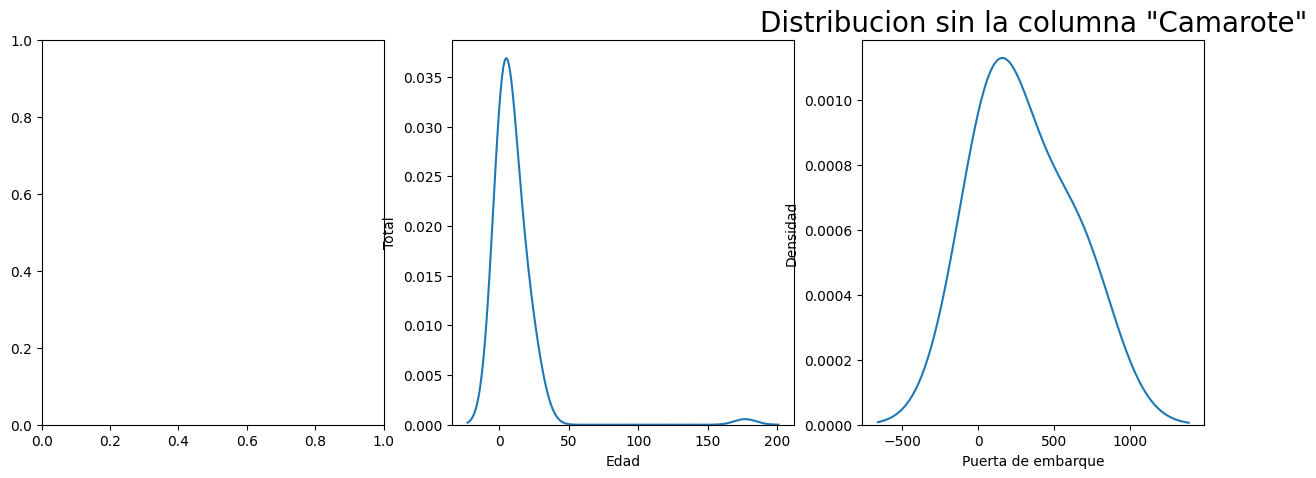

In [97]:
# al eliminar el camarote por los datos nan que contenia nos qiedaría así los gráficos y vemos como edad se ha centrado un poco mas a 0
fig, ax= plt.subplots(1, 3, figsize=(15,5))

sns.kdeplot(df['Edad'].value_counts(), ax= ax[1]).set_ylabel('Total')

sns.kdeplot(df['Puerta de embarque'].value_counts(), ax= ax[2]).set_ylabel('Densidad')
plt.title('Distribucion sin la columna "Camarote"',loc='center', size=20);

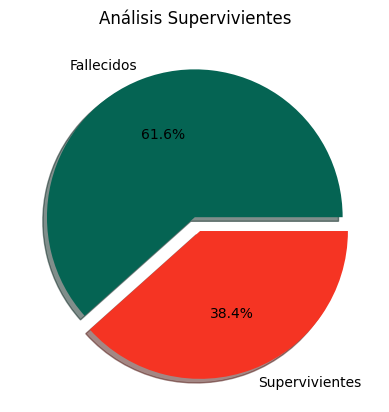

In [22]:
# vemos en un grafico tarta los valores de supervivientes
labels=['Fallecidos', 'Supervivientes']
colores=['#056453','#F53423']
plt.pie(df['Superviviente'].value_counts(), autopct='%1.1f%%', labels =labels,explode= [0,0.1], shadow= True, colors=colores)
plt.title('Análisis Supervivientes'); 


In [23]:
# pruebas de supervivientes porcentaje
porcentaje=df['Superviviente'].value_counts()/df['Superviviente'].count()*100
pd.DataFrame(porcentaje)

,Superviviente
Muertos,61.616162
Vivos,38.383838


In [98]:
# numero total de supervivientes
total=df['Superviviente'].groupby(df['Clase']).value_counts()
total



Clase  Superviviente
1      1                136
       0                 80
2      0                 97
       1                 87
3      0                372
       1                119
Name: Superviviente, dtype: int64

In [99]:
#grafico que muestra el precio de pasaje por la edad

fig = px.scatter(df, x="Edad", y='Precio pasaje', template="plotly_dark")
fig.show()

In [23]:
df.describe() # un analisis general de las variables numéricas

,PassengerId,Superviviente,Edad,SibSp,Parch,Precio pasaje
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# probando filtros
filtro1= df.loc[:,['Sexo','Superviviente']].value_counts()
f =pd.DataFrame(filtro1)
print(f)



                        0
Sexo   Superviviente     
Hombre Muertos        468
Mujer  Vivos          233
Hombre Vivos          109
Mujer  Muertos         81


In [100]:
# cambio de nombre del contenido de la columna embarque
df['Puerta de embarque']= df['Puerta de embarque'].map({'S': 'Southamptom', 'C': 'Cherbourg', 'Q': 'Queenstown'})


In [29]:
# vemos como va quedando el dataframe
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Precio pasaje,Puerta de embarque
0,1,Muertos,Tercera,"Braund, Mr. Owen Harris",Hombre,22,1,0,A/5 21171,7.2500,Southamptom
1,2,Vivos,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38,1,0,PC 17599,71.2833,Cherbourg
2,3,Vivos,Tercera,"Heikkinen, Miss. Laina",Mujer,26,0,0,STON/O2. 3101282,7.9250,Southamptom
3,4,Vivos,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35,1,0,113803,53.1000,Southamptom
4,5,Muertos,Tercera,"Allen, Mr. William Henry",Hombre,35,0,0,373450,8.0500,Southamptom
...,...,...,...,...,...,...,...,...,...,...,...
886,887,Muertos,Segunda,"Montvila, Rev. Juozas",Hombre,27,0,0,211536,13.0000,Southamptom
887,888,Vivos,Primera,"Graham, Miss. Margaret Edith",Mujer,19,0,0,112053,30.0000,Southamptom
888,889,Muertos,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29,1,2,W./C. 6607,23.4500,Southamptom
889,890,Vivos,Primera,"Behr, Mr. Karl Howell",Hombre,26,0,0,111369,30.0000,Cherbourg


Text(0, 0.5, 'Cantidad')

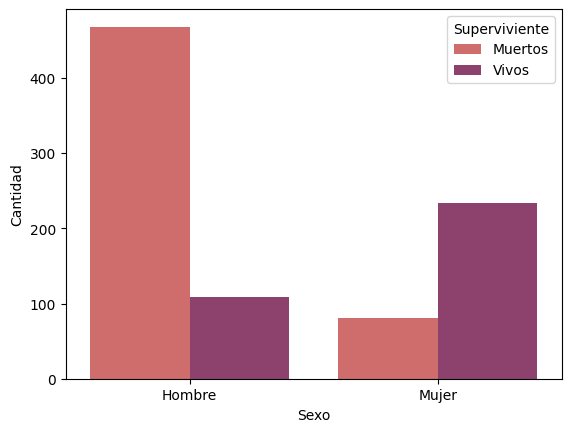

In [30]:
 # analisis este me gusta mas y comparamos superviviente con el sexo

grafico1= sns.countplot(data =df, x='Sexo', hue='Superviviente', palette='flare')
grafico1.set_xlabel('Sexo')
grafico1.set_ylabel('Cantidad')



In [108]:
# hacemos lo mismo pero con una tabla
clases= df.groupby(['Sexo', 'Superviviente'])['Clase'].value_counts()
clases



Sexo    Superviviente  Clase
Hombre  0              3        300
                       2         91
                       1         77
        1              3         47
                       1         45
                       2         17
Mujer   0              3         72
                       2          6
                       1          3
        1              1         91
                       3         72
                       2         70
Name: Clase, dtype: int64

<Axes: xlabel='Sexo', ylabel='Clase'>

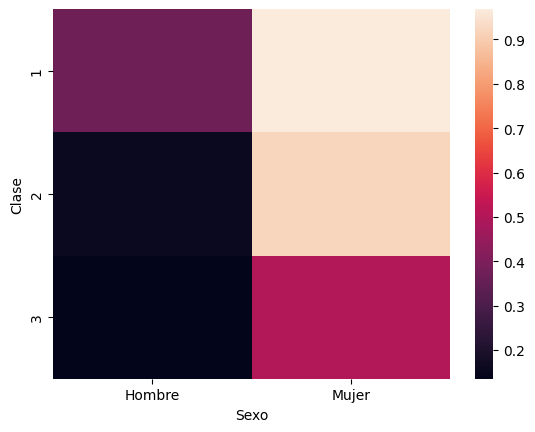

In [101]:
# otro grafico esta vez relacionando sexo , supervivientes y la clse
result=df.pivot_table(values='Superviviente',index='Clase',columns='Sexo')# lo hemos pasado a un grafico de calor, donde el negro es dead , los hombre murieron
sns.heatmap(result)

In [102]:
# vemos las puertas de embarque que tiene el titanic, solo 3
print(df['Puerta de embarque'].unique())

['Southamptom' 'Cherbourg' 'Queenstown']


In [103]:
# media de edad , testeando
df['Edad'].mean()

29.69911764705882

In [34]:
#media de edad por clases con tabla
average_age_sex = df.groupby('Clase')['Edad'].mean().reset_index()
average_age_sex

,Clase,Edad
0,Primera,36.944444
1,Segunda,29.804348
2,Tercera,26.191446


In [35]:
# media de edad por clases con grafico
fig=px.line(average_age_sex, x='Clase', y='Edad', title='Media de la Edad por clases del Titanic', template="plotly_dark", color_discrete_sequence=['yellow'])
fig.show()

In [36]:
# haciendo pruebas de rangos de edad
menor16=df[(df['Edad']>0) & (df['Edad']<16)]
menor16.count()

PassengerId           76
Superviviente         76
Clase                 76
Nombre                76
Sexo                  76
Edad                  76
SibSp                 76
Parch                 76
Ticket                76
Precio pasaje         76
Puerta de embarque    76
dtype: int64

In [32]:
# haciendo pruebas de rangos de edad
mayor16=df[(df['Edad']>16) & (df['Edad']<50)]
mayor16.count()


PassengerId           717
Superviviente         717
Clase                 717
Nombre                717
Sexo                  717
Edad                  717
SibSp                 717
Parch                 717
Ticket                717
Precio pasaje         717
Puerta de embarque    717
dtype: int64

In [54]:
# haciendo pruebas de rangos de edad
mayor60=df[(df['Edad'] > 50)]
mayor60.count()


PassengerId           64
Superviviente         64
Clase                 64
Nombre                64
Sexo                  64
Edad                  64
SibSp                 64
Parch                 64
Ticket                64
Precio pasaje         64
Puerta de embarque    64
Titulos               64
dtype: int64

In [107]:
# con cut podemos separar por rango de edad, con el bins indicamos los rangos y luego los nombramos 

df['Rango_Edad']=pd.cut(df['Edad'], bins=[0,16,50,100],labels=['Jóvenes', 'Adultos', 'Mayores'])
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Precio pasaje,Puerta de embarque,Rango_Edad
0,1,0,3,"Braund, Mr. Owen Harris",Hombre,22.000000,1,0,A/5 21171,7.2500,Southamptom,Adultos
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.000000,1,0,PC 17599,71.2833,Cherbourg,Adultos
2,3,1,3,"Heikkinen, Miss. Laina",Mujer,26.000000,0,0,STON/O2. 3101282,7.9250,Southamptom,Adultos
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.000000,1,0,113803,53.1000,Southamptom,Adultos
4,5,0,3,"Allen, Mr. William Henry",Hombre,35.000000,0,0,373450,8.0500,Southamptom,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Hombre,27.000000,0,0,211536,13.0000,Southamptom,Adultos
887,888,1,1,"Graham, Miss. Margaret Edith",Mujer,19.000000,0,0,112053,30.0000,Southamptom,Adultos
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.699118,1,2,W./C. 6607,23.4500,Southamptom,Adultos
889,890,1,1,"Behr, Mr. Karl Howell",Hombre,26.000000,0,0,111369,30.0000,Cherbourg,Adultos


In [111]:
# una tabla por rangos de edad con los supervivientes por clase
clases = df.groupby(['Rango_Edad', 'Superviviente'])['Clase'].value_counts().rename('Total')
clases

Rango_Edad  Superviviente  Clase  
Jóvenes     Muertos        Tercera     42
                           Segunda      2
                           Primera      1
            Vivos          Tercera     28
                           Segunda     19
                           Primera      8
Adultos     Muertos        Tercera    321
                           Segunda     83
                           Primera     58
            Vivos          Primera    110
                           Tercera     90
                           Segunda     65
Mayores     Muertos        Primera     21
                           Segunda     12
                           Tercera      9
            Vivos          Primera     18
                           Segunda      3
                           Tercera      1
Name: Total, dtype: int64

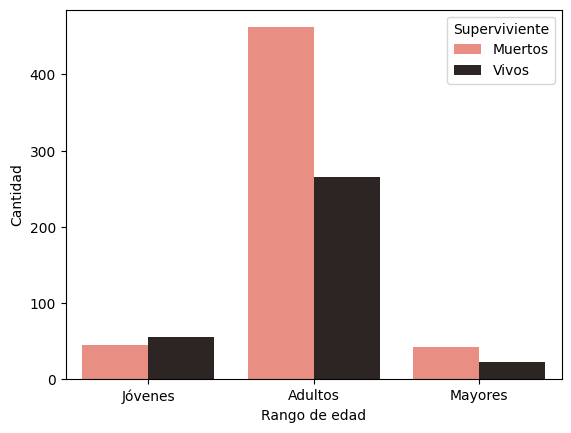

In [112]:
# grafico con la relacion de los rangos de edad y los supervivientes
grafico1= sns.countplot(data =df, x='Rango_Edad', hue='Superviviente', palette='dark:salmon_r') # analisis este me gusta mas y comparamos son el sexo
grafico1.set_xlabel('Rango de edad')
grafico1.set_ylabel('Cantidad');



In [40]:
# nommbres y titulos pruebas

Mr= df[df['Nombre'].str.contains('Mr')]
df[df['Nombre'].str.contains('Miss')].groupby(['Clase']).head()




,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Precio pasaje,Puerta de embarque,Rango_Edad
2,3,Vivos,Tercera,"Heikkinen, Miss. Laina",Mujer,26,0,0,STON/O2. 3101282,7.9250,Southamptom,Adultos
10,11,Vivos,Tercera,"Sandstrom, Miss. Marguerite Rut",Mujer,4,1,1,PP 9549,16.7000,Southamptom,Jóvenes
11,12,Vivos,Primera,"Bonnell, Miss. Elizabeth",Mujer,58,0,0,113783,26.5500,Southamptom,Mayores
14,15,Muertos,Tercera,"Vestrom, Miss. Hulda Amanda Adolfina",Mujer,14,0,0,350406,7.8542,Southamptom,Jóvenes
22,23,Vivos,Tercera,"McGowan, Miss. Anna ""Annie""",Mujer,15,0,0,330923,8.0292,Queenstown,Jóvenes
24,25,Muertos,Tercera,"Palsson, Miss. Torborg Danira",Mujer,8,3,1,349909,21.0750,Southamptom,Jóvenes
43,44,Vivos,Segunda,"Laroche, Miss. Simonne Marie Anne Andree",Mujer,3,1,2,SC/Paris 2123,41.5792,Cherbourg,Jóvenes
56,57,Vivos,Segunda,"Rugg, Miss. Emily",Mujer,21,0,0,C.A. 31026,10.5000,Southamptom,Adultos
58,59,Vivos,Segunda,"West, Miss. Constance Mirium",Mujer,5,1,2,C.A. 34651,27.7500,Southamptom,Jóvenes
61,62,Vivos,Primera,"Icard, Miss. Amelie",Mujer,38,0,0,113572,80.0000,Southamptom,Adultos


In [113]:
# titulos de los pasajeros y tripulacion del barco
titles=df['Titulos']= df['Nombre'].apply(lambda x: x.split(',')[1].split('.')[0])
titles.value_counts()
#split('.')[0].split())

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Nombre, dtype: int64

In [42]:
#grafico que es poco explicativo para mostrar los titilos y supervivientes

fig = px.bar(df, x='Titulos', y='Superviviente', template="plotly_white")# cambiar
fig.show()

In [114]:

df.groupby(['Superviviente']),df['Nombre'].str.contains('Mrs').count()


(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x12f0b5990>, 891)

In [43]:
#graficamos los titulos por clase

fig = px.scatter(df, x='Clase', y='Titulos', title='Títulos viajaban en primera clase', template="plotly_dark") #Podemos adatpar el fondo del gráfico mediante el uso de templates.
fig.show()

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_69575/4023659530.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_69575/4023659530.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



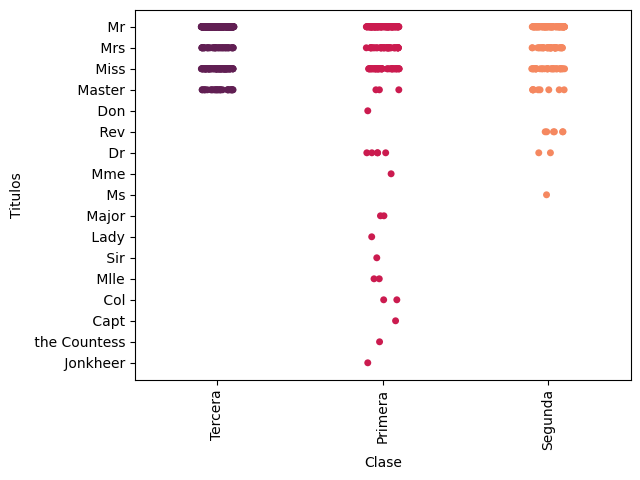

In [122]:

# otra forma que es la elegida para mostrar los por titulos y la clase donde se alojaban
graph = sns.stripplot(x='Clase', y='Titulos', data=df, size=5, orient="vertical", jitter=True, palette="rocket", legend='auto')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90);

In [45]:

# pruebas con los supervivientes y el precio del pasaje
fig = px.strip(df, x="Precio pasaje", y="Titulos", template="plotly_dark", color='Superviviente', title="Supervivientes según el precio del pasaje" )
fig.update_xaxes(tickangle=360)
fig.show()

In [ ]:
edad= df['Edad']
edad

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Edad, Length: 891, dtype: int64

In [115]:
# pruebas con un filtrado
df[(df['Edad']>5) & (df['Edad']<=30) & (df['Superviviente']==1)].drop('Superviviente', axis= 'columns')
df


,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Precio pasaje,Puerta de embarque,Rango_Edad,Titulos
0,1,Muertos,Tercera,"Braund, Mr. Owen Harris",Hombre,22.000000,1,0,A/5 21171,7.2500,Southamptom,Adultos,Mr
1,2,Vivos,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.000000,1,0,PC 17599,71.2833,Cherbourg,Adultos,Mrs
2,3,Vivos,Tercera,"Heikkinen, Miss. Laina",Mujer,26.000000,0,0,STON/O2. 3101282,7.9250,Southamptom,Adultos,Miss
3,4,Vivos,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.000000,1,0,113803,53.1000,Southamptom,Adultos,Mrs
4,5,Muertos,Tercera,"Allen, Mr. William Henry",Hombre,35.000000,0,0,373450,8.0500,Southamptom,Adultos,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Muertos,Segunda,"Montvila, Rev. Juozas",Hombre,27.000000,0,0,211536,13.0000,Southamptom,Adultos,Rev
887,888,Vivos,Primera,"Graham, Miss. Margaret Edith",Mujer,19.000000,0,0,112053,30.0000,Southamptom,Adultos,Miss
888,889,Muertos,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.699118,1,2,W./C. 6607,23.4500,Southamptom,Adultos,Miss
889,890,Vivos,Primera,"Behr, Mr. Karl Howell",Hombre,26.000000,0,0,111369,30.0000,Cherbourg,Adultos,Mr


In [65]:
nombre=df['Titulos'].str.contains('Count').head()
nombre


0    False
1    False
2    False
3    False
4    False
Name: Titulos, dtype: bool

In [117]:
# la intención era filtrar los pasajeros con 'MR' de primera, pero no sale bien
clase3mr=df[df['Clase']=='Primera']['Nombre'].groupby(df['Nombre'].str.contains('Mr.')).head().sort_values()
clase3mr

11                              Bonnell, Miss. Elizabeth
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
88                            Fortune, Miss. Mabel Helen
27                        Fortune, Mr. Charles Alexander
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
61                                   Icard, Miss. Amelie
6                                McCarthy, Mr. Timothy J
136                         Newsom, Miss. Helen Monypeny
23                          Sloper, Mr. William Thompson
30                              Uruchurtu, Don. Manuel E
Name: Nombre, dtype: object

In [118]:
# media de edad por clase y sexo
df.groupby(['Clase', 'Sexo'])['Edad'].mean()

Clase    Sexo  
Primera  Hombre    39.287717
         Mujer     34.141405
Segunda  Hombre    30.653908
         Mujer     28.748661
Tercera  Hombre    27.372153
         Mujer     24.068493
Name: Edad, dtype: float64

In [119]:
condes=df['Titulos']
condes

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Titulos, Length: 891, dtype: object

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_69575/4142857971.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



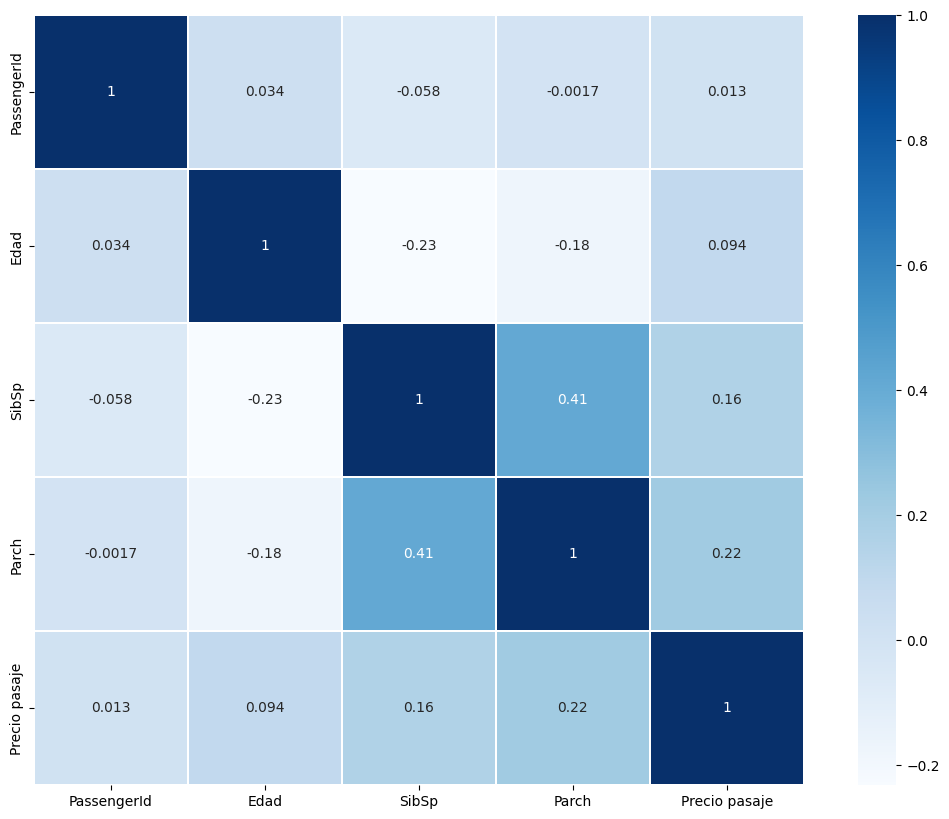

In [51]:
# correlacion entre columnas, pero no se va a exponer en el proyecto
plt.figure(figsize= (14,10))
sns.heatmap(df.corr(), linewidths=0.1, square= True, cmap= 'Blues', annot= True);
plt.show()

In [120]:
#otro filtrado para 
data1 = df.groupby(['Clase','Sexo'])['Clase'].count()
data1

Clase    Sexo  
Primera  Hombre    122
         Mujer      94
Segunda  Hombre    108
         Mujer      76
Tercera  Hombre    347
         Mujer     144
Name: Clase, dtype: int64

In [121]:
# graficos para ver las variables numericas despues de todo el proceso, no se nota mucha diferencia :()
import plotly.graph_objects as go
from plotly.subplots import make_subplots

edades = ['Edad','SibSp','Precio pasaje','Clase']
fig = make_subplots(rows=1, cols=4)

for i, col in enumerate(edades):
    fig.add_trace(go.Histogram(x=df[col], nbinsx=20, name=f'Distribución de {col}'), row=1, col=i+1 )

fig.update_layout(height=500, width=1200, title_text="Distribución Variables Numéricas", showlegend=True)
fig.show()

In [54]:
dfc =df.copy()
dfc.to_csv('titanicc.csv')